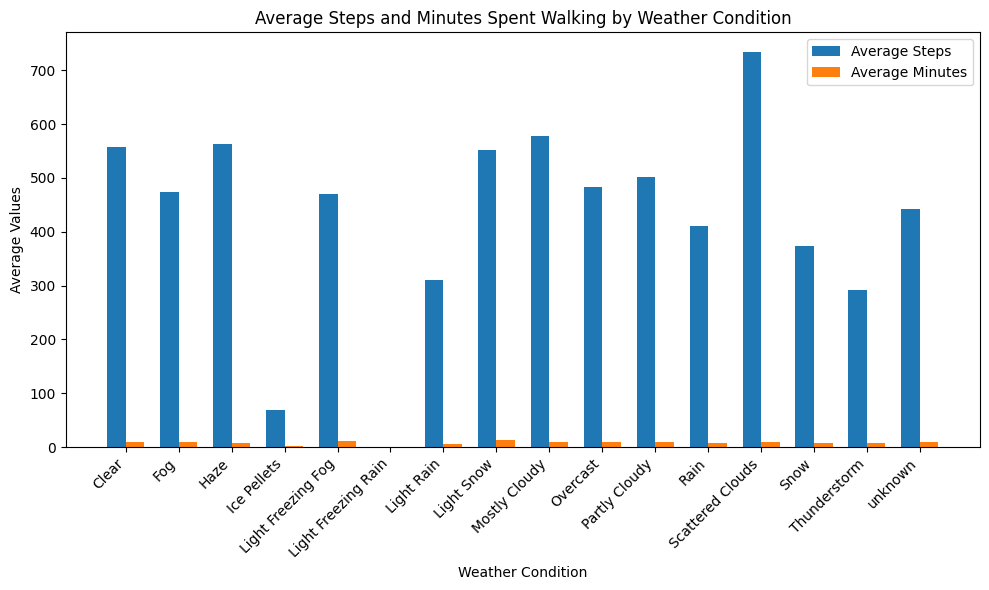

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

filtered_suggestions_df = pd.read_csv("data/modified_data/Cleaned Dataset.csv")

# Step 1: Group by 'dec.weather.condition' and calculate the average of 'jbsteps60' and 'jbmins60'
weather_groups = filtered_suggestions_df.groupby('dec.weather.condition').agg(
    avg_steps=('jbsteps60', 'mean'),
    avg_minutes=('jbmins60', 'mean')
).reset_index()

# Step 2: Create a bar graph to show the average steps and minutes spent walking for each weather condition

# Set up bar positions
bar_width = 0.35
index = np.arange(len(weather_groups['dec.weather.condition']))

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the average steps as bars
bars1 = ax.bar(index, weather_groups['avg_steps'], bar_width, label='Average Steps')

# Plot the average minutes as bars, positioned next to the steps bars
bars2 = ax.bar(index + bar_width, weather_groups['avg_minutes'], bar_width, label='Average Minutes')

# Set labels and title
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Average Values')
plt.title('Average Steps and Minutes Spent Walking by Weather Condition')

# Set x-ticks to be in the middle of the grouped bars
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(weather_groups['dec.weather.condition'], rotation=45, ha='right')

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


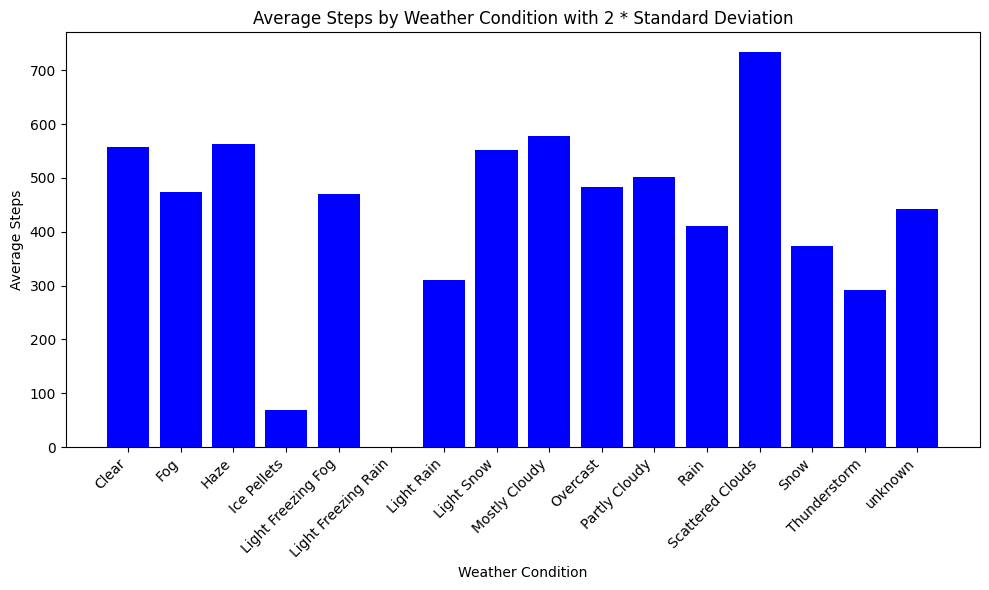

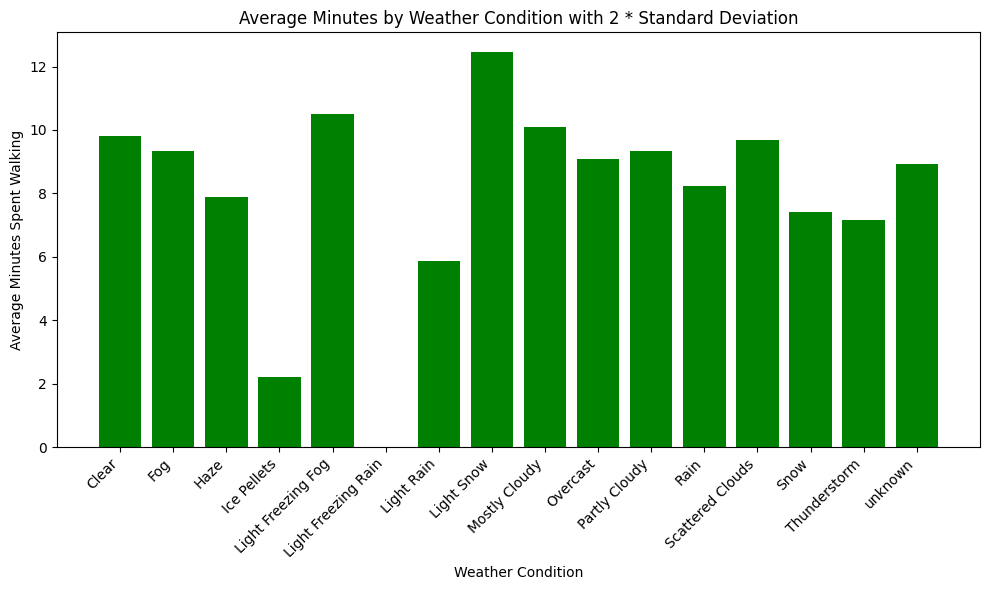

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate 2 * standard deviation
def two_std_dev(data):
    return 0.5 * np.std(data)

# Step 1: Group by 'dec.weather.condition' and calculate the average of 'jbsteps60' and 'jbmins60' with 2 * standard deviation
grouped = filtered_suggestions_df.groupby('dec.weather.condition').agg(
    avg_steps=('jbsteps60', 'mean'),
    avg_minutes=('jbmins60', 'mean'),
).reset_index()

# Step 2: Plot with 2 * standard deviation as error bars

# Plot for Average Steps with 2 * standard deviation
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(grouped['dec.weather.condition'], grouped['avg_steps'],color='blue', )
ax1.set_xlabel('Weather Condition')
ax1.set_ylabel('Average Steps')
ax1.set_title('Average Steps by Weather Condition with 2 * Standard Deviation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot for Average Minutes with 2 * standard deviation
fig, ax2 = plt.subplots(figsize=(10, 6))
ax2.bar(grouped['dec.weather.condition'], grouped['avg_minutes'], color='green')
ax2.set_xlabel('Weather Condition')
ax2.set_ylabel('Average Minutes Spent Walking')
ax2.set_title('Average Minutes by Weather Condition with 2 * Standard Deviation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
